In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [68]:
health_df=pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")
brain_df=pd.read_csv("/kaggle/input/brain-tumor/Brain Tumor.csv")
bt_df=pd.read_csv("/kaggle/input/brain-tumor/bt_dataset_t3.csv")

In [101]:
brain_df.sample()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
368,Image369,0,10.575638,861.357446,29.348892,0.116412,3.155664,10.210291,263.094703,0.303534,0.092133,0.560764,5.481069,0.943263,7.458341e-155


In [102]:
bt_df.sample()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
278,Image279,0.108459,13.287319,3.645177,0.99784,33.607784,1131.086888,7.093759,0.998745,0.997491,0.999042,0.06046,0.76636,7.458341e-155,71.755628,0.99033,0.00434,0.31694,1


In [69]:
health_df.sample()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
44410,rAYmoNd grant,40,Female,A+,Obesity,2021-03-28,Ann Chapman,"and Hartman, Miller Brown",Cigna,49219.789247,240,Urgent,2021-04-16,Ibuprofen,Normal


In [70]:
count_v=CountVectorizer()
tfidf_v=TfidfVectorizer()
hashing_v=HashingVectorizer()

In [88]:
def count_f(column):
    count_v.fit(column)
    count_t=count_v.transform(column)
    return count_t
def tfid_f(df,columns):
    for column in columns:
        df[column]=tfidf_v.fit_transform(df[column])
#         df[column]=tfidf_v.transform(df[column])
    
    return df

In [89]:
# health_df["Name"]=list(tfid_f(health_df["Name"]))

# lower case

In [73]:
def lower_case(df,text):
    for col in text:
        df[col]=df[col].str.lower()
    return df
def short_lower(text):
    text=lower_case(text)
    return text

In [74]:
import string
# punt=string.punctuation
def remove_punct(df, columns):
    punct = string.punctuation
    translator = str.maketrans('', '', punct)
    for column in columns:
        df[column] = df[column].apply(lambda x: x.translate(translator))
    return df

In [103]:
# remove_punct(health_df,["Doctor"])

In [85]:
# def tfid_f(df, columns):
#     for column in columns:
#         # Instantiate TfidfVectorizer
#         tfidf_v = TfidfVectorizer()
#         # Fit and transform the column data
#         transformed_data = tfidf_v.fit_transform(df[column].astype(str))  # Ensure the input is treated as strings
#         # Convert the transformed data to dense array
#         transformed_array = transformed_data.toarray()
#         # Convert the dense array to DataFrame
#         transformed_df = pd.DataFrame(transformed_array, columns=tfidf_v.get_feature_names_out())
#         # Rename the columns to indicate the original column name
#         transformed_df.columns = [f"{column}_{col}" for col in transformed_df.columns]
#         # Drop the original column and join the new TF-IDF columns
#         df = df.drop(column, axis=1).join(transformed_df)
#     return df

In [76]:
health_df=lower_case(health_df,["Doctor","Hospital","Name","Insurance Provider","Admission Type","Test Results","Medical Condition","Blood Type","Gender","Medication"])

In [ ]:
health_df=remove_punt(health_df,["Doctor","Hospital","Name","Insurance Provider","Admission Type","Test Results","Medical Condition","Blood Type","Gender","Medication"])

In [93]:
def tfid_f1(df, columns):
    for column in columns:
        print(f"Processing column: {column}")
        # Add additional print statements or debugging code here
        df[column] = tfidf_v.fit_transform(df[column])
    return df


In [ ]:
print(health_df["Doctor"].dtypes)

In [ ]:
health_df=tfid_f1(health_df,["Doctor","Hospital","Name","Insurance Provider","Admission Type","Test Results","Medical Condition","Blood Type","Gender","Medication"])

In [34]:
# health_df["Doctor"]=lower_case(health_df["Doctor"])

In [116]:
def to_dat(df,columns):
    for column in columns:
        df[column]=pd.to_datetime(df[column], format='%Y-%m-%d').astype(int)
        return df

In [ ]:
# plt.plot(health_df[""])
# plt.show()

In [117]:
health_df=to_dat(health_df,["Date of Admission","Discharge Date"])

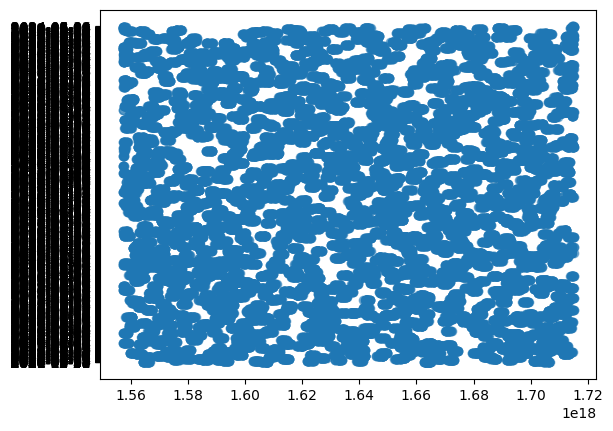

In [131]:
plt.scatter(health_df["Date of Admission"],health_df["Discharge Date"],alpha=0.5)
# plt.grid(True)
plt.show()

In [ ]:
dro_df=health_df.drop([health_df["Date of Admission"],health_df["Discharge Date"]])

# Processed data of healthcare_dataset 1.7 GB


In [100]:
health_df.nunique()

Age                          77
Date of Admission          1827
Billing Amount            50000
Room Number                 400
Discharge Date             1856
                          ...  
Medication_aspirin            2
Medication_ibuprofen          2
Medication_lipitor            2
Medication_paracetamol        2
Medication_penicillin         2
Length: 4232, dtype: int64

In [55]:
bt_df.sample()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
1339,Image1340,1.362885,142.215837,11.925428,0.972266,8.70084,76.927249,28.907985,0.983805,0.967872,0.988772,0.323989,0.91102,7.458341e-155,63.842934,0.960161,0.02684,0.511995,1


In [56]:
bt_df["Image"].nunique()

1644

In [57]:
brain_df.sample(3)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
1595,Image1596,1,11.347519,1587.868718,39.848070,0.026082,3.939230,15.914156,207.235025,0.138581,0.019205,0.423284,5.422833,0.975149,7.458341e-155
2504,Image2505,1,23.786865,2030.735901,45.063687,0.010729,2.491832,6.602688,178.071318,0.087738,0.007698,0.399016,5.526692,0.957064,7.458341e-155
2581,Image2582,1,3.128922,520.050907,22.804625,0.001935,7.676035,60.412702,90.655000,0.036657,0.001344,0.261810,6.448333,0.959571,7.458341e-155


In [58]:
brain_df["Class"].nunique()

2

In [59]:
bt_df["Target"].nunique()

2